In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-agriculture-crop-production/India Agriculture Crop Production.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

# Read Data

In [3]:
data = pd.read_csv('/kaggle/input/india-agriculture-crop-production/India Agriculture Crop Production.csv')
# data = data.sample(frac=0.25)

# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [5]:
data['State'].value_counts()

Uttar Pradesh                  44781
Madhya Pradesh                 29906
Karnataka                      27493
Bihar                          24697
Rajasthan                      20363
Tamil Nadu                     18525
Assam                          18186
Maharashtra                    17922
Andhra Pradesh                 16363
Odisha                         16153
Chhattisgarh                   15285
Gujarat                        14053
West Bengal                    12596
Haryana                         8305
Uttarakhand                     6702
Nagaland                        5676
Himachal Pradesh                5043
Jharkhand                       5004
Kerala                          4870
Telangana                       4704
Jammu and Kashmir               4348
Arunachal Pradesh               4345
Meghalaya                       4322
Punjab                          4142
Manipur                         3120
Tripura                         2557
Mizoram                         2112
P

In [6]:
data['District'].value_counts()

BILASPUR                                        1244
BIJAPUR                                         1218
AURANGABAD                                      1164
DAVANGERE                                       1151
HAVERI                                          1147
                                                ... 
CHARAIDEO                                          2
BISWANATH                                          2
SOUTH SALMARA MANCACHAR                            1
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU       1
MUMBAI                                             1
Name: District, Length: 729, dtype: int64

In [7]:
data['Crop'].value_counts()

Rice                     21611
Maize                    20507
Moong(Green Gram)        15101
Urad                     14581
Sesamum                  13049
Groundnut                12586
Wheat                    11248
Rapeseed &Mustard        11034
Sugarcane                10942
Arhar/Tur                10895
Potato                   10756
Onion                    10675
Gram                     10474
Jowar                     9769
Dry chillies              8971
Bajra                     7796
Peas & beans (Pulses)     7266
Sunflower                 7244
Small millets             6985
Cotton(lint)              6475
Masoor                    6383
Turmeric                  5953
Linseed                   5892
Barley                    5891
Ragi                      5757
Sweet potato              5742
Other Kharif pulses       5720
Horse-gram                5424
Coriander                 5037
Garlic                    5032
Soyabean                  4988
Other Rabi pulses         4866
Ginger  

In [8]:
data['Season'].value_counts()

Kharif        138400
Rabi          100977
Whole Year     68689
Summer         22101
Winter          8250
Autumn          6989
Name: Season, dtype: int64

In [9]:
data['Area Units'].value_counts()

Hectare    345407
Name: Area Units, dtype: int64

***Hence, All the units of Area are in Hectare only so we can drop this column later.***

In [10]:
data['Production Units'].value_counts()

Tonnes    331686
Bales      10794
Nuts        2927
Name: Production Units, dtype: int64

***As we can see there are Bales and Nuts unit of Production other than Tonnes. There are few things we can do about it:--***
* We can change the units of Bales and Nuts into Tonnes 
* We can just drop the datas of Bales or Nuts

***We will be choosing the 2nd option because we have huge number of data.***

In [11]:
data = data[data['Production Units']=='Tonnes']

In [12]:
data.describe(include='object')

,State,District,Crop,Year,Season,Area Units,Production Units
count,331686,331686,331654,331686,331685,331686,331686
unique,36,729,52,24,6,1,1
top,Uttar Pradesh,BILASPUR,Rice,2019-20,Kharif,Hectare,Tonnes
freq,44473,1220,21611,18529,128624,331686,331686


***Check Null Values***

In [13]:
data.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4687
Production Units       0
Yield                 33
dtype: int64

***As we can see there is some null values. we will just drop those null values due to huge datasets otherwise we will try to replace it with some mean values.***

In [14]:
data.dropna(inplace=True)

# Encoding

In [15]:
category_col =['State','District','Crop','Season']  
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    data[col] = labelEncoder.fit_transform(data[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'State': {'Andaman and Nicobar Islands': 0, 'Andhra Pradesh': 1, 'Arunachal Pradesh': 2, 'Assam': 3, 'Bihar': 4, 'Chandigarh': 5, 'Chhattisgarh': 6, 'Dadra and Nagar Haveli': 7, 'Daman and Diu': 8, 'Delhi': 9, 'Goa': 10, 'Gujarat': 11, 'Haryana': 12, 'Himachal Pradesh': 13, 'Jammu and Kashmir': 14, 'Jharkhand': 15, 'Karnataka': 16, 'Kerala': 17, 'Laddakh': 18, 'Madhya Pradesh': 19, 'Maharashtra': 20, 'Manipur': 21, 'Meghalaya': 22, 'Mizoram': 23, 'Nagaland': 24, 'Odisha': 25, 'Puducherry': 26, 'Punjab': 27, 'Rajasthan': 28, 'Sikkim': 29, 'Tamil Nadu': 30, 'Telangana': 31, 'Tripura': 32, 'Uttar Pradesh': 33, 'Uttarakhand': 34, 'West Bengal': 35}, 'District': {'24 PARAGANAS NORTH': 0, '24 PARAGANAS SOUTH': 1, 'ADILABAD': 2, 'AGAR MALWA': 3, 'AGRA': 4, 'AHMADABAD': 5, 'AHMEDNAGAR': 6, 'AIZAWL': 7, 'AJMER': 8, 'AKOLA': 9, 'ALAPPUZHA': 10, 'ALIGARH': 11, 'ALIPURDUAR': 12, 'ALIRAJPUR': 13, 'ALLAHABAD': 14, 'ALMORA': 15, 'ALWAR': 16, 'AMBALA': 17, 'AMBEDKAR NAGAR': 18, 'AMETHI': 19, 'AMRAVAT

In [16]:
data

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,0,481,0,2001-02,1,1254.0,Hectare,2061.0,Tonnes,1.643541
1,0,481,0,2002-03,4,1258.0,Hectare,2083.0,Tonnes,1.655803
2,0,481,0,2003-04,4,1261.0,Hectare,1525.0,Tonnes,1.209358
3,0,485,0,2001-02,1,3100.0,Hectare,5239.0,Tonnes,1.690000
4,0,627,0,2002-03,4,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
345370,35,527,50,2000-01,2,6310.0,Hectare,15280.0,Tonnes,2.421553
345371,35,531,50,1997-98,2,1895.0,Hectare,2760.0,Tonnes,1.456464
345372,35,531,50,1998-99,2,3736.0,Hectare,5530.0,Tonnes,1.480193
345373,35,531,50,1999-00,2,2752.0,Hectare,6928.0,Tonnes,2.517442


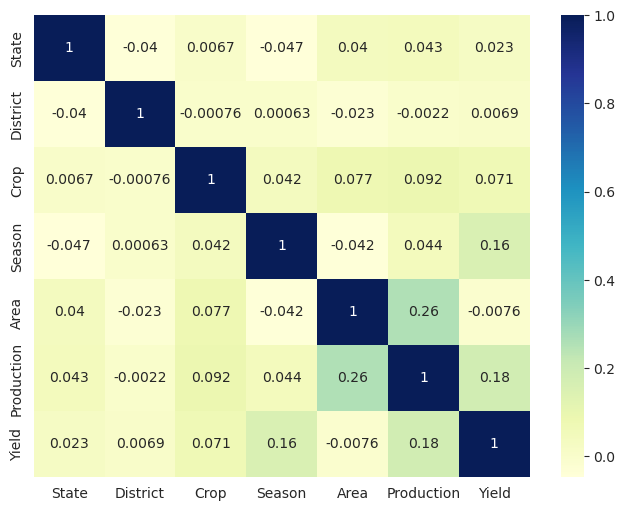

In [17]:
# Heatmap to find any high correlations
plt.figure(figsize=(8,6))
sns.heatmap(data=data.corr(), cmap="YlGnBu",annot=True)
plt.show()

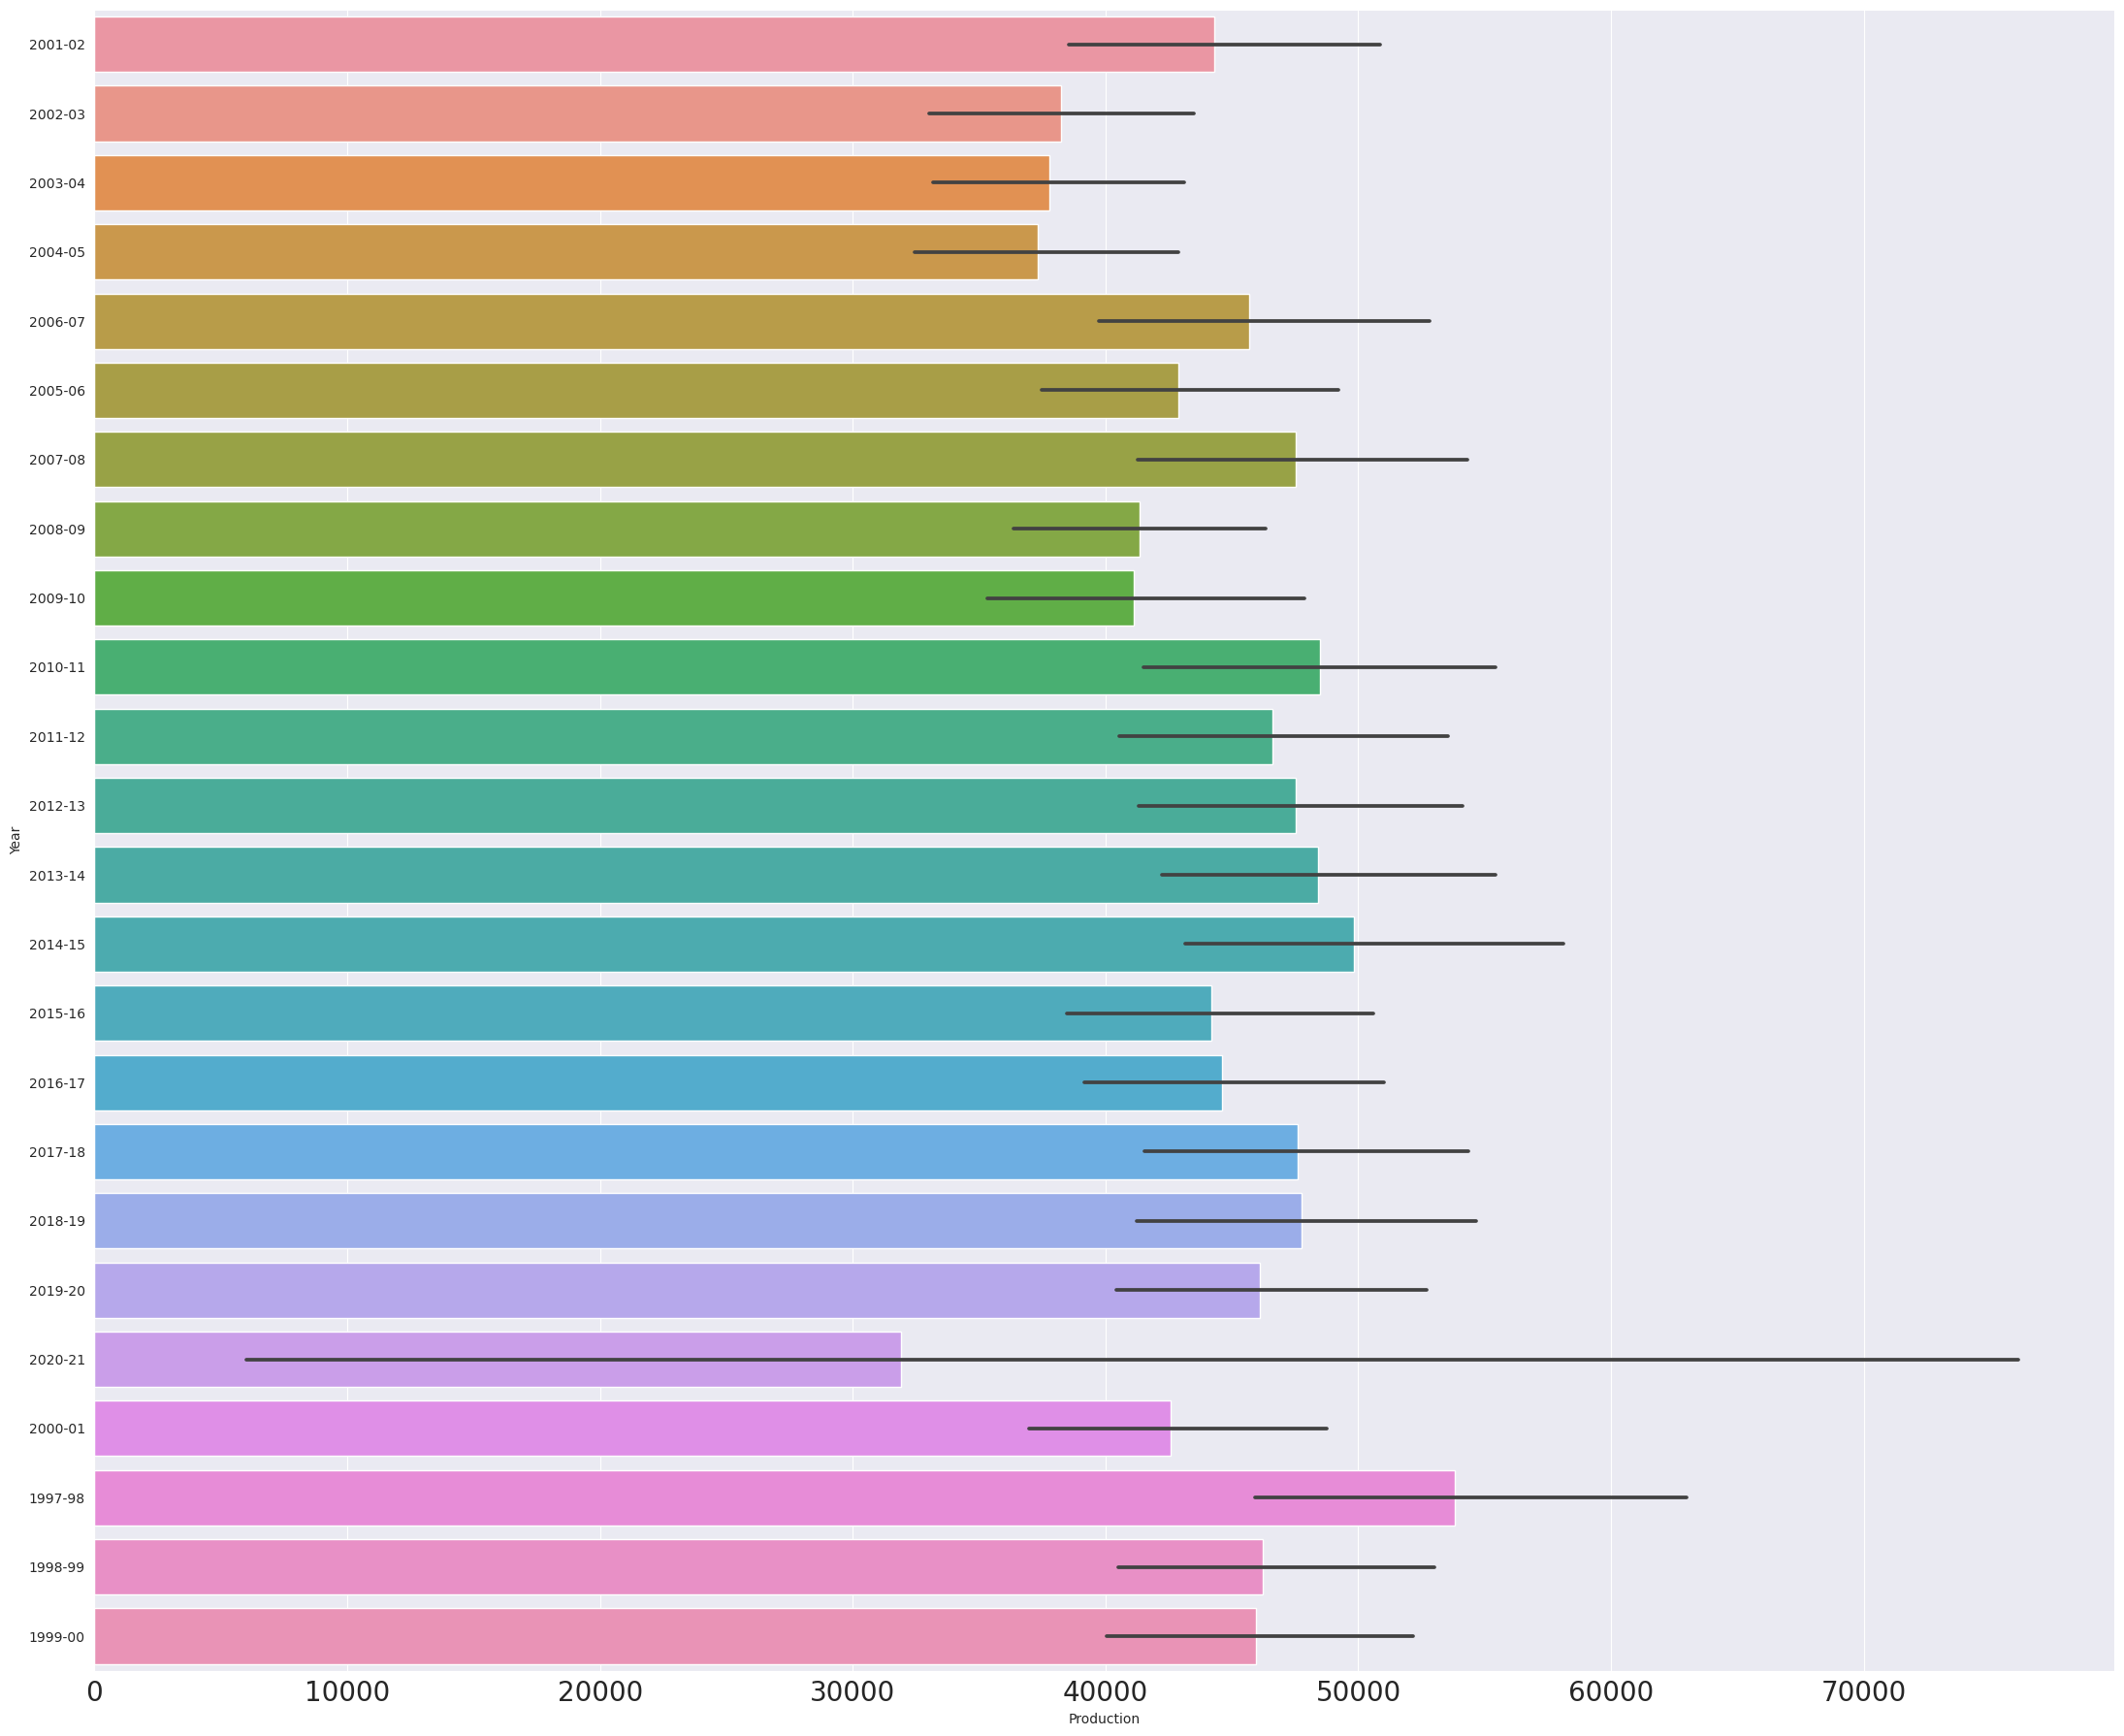

In [18]:
plt.figure(figsize=(22,18)) # this creates a figure 22 inch wide, 18 inch high

ax = sns.barplot(y=data['Year'],x=data['Production'])
plt.setp(ax.get_xticklabels(), rotation=0,fontsize=20)
plt.tight_layout()
plt.show()

In [19]:
df = data[['State','District','Crop','Season','Area','Production']]
df

,State,District,Crop,Season,Area,Production
0,0,481,0,1,1254.0,2061.0
1,0,481,0,4,1258.0,2083.0
2,0,481,0,4,1261.0,1525.0
3,0,485,0,1,3100.0,5239.0
4,0,627,0,4,3105.0,5267.0
...,...,...,...,...,...,...
345370,35,527,50,2,6310.0,15280.0
345371,35,531,50,2,1895.0,2760.0
345372,35,531,50,2,3736.0,5530.0
345373,35,531,50,2,2752.0,6928.0


In [20]:
X = df.drop('Production',axis=1)
Y = df['Production']

# Split into Train and Test

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Train & Test Data using Random Forest

In [22]:
model = RandomForestRegressor(n_estimators=20,
                             max_depth=10,
                             criterion='mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [23]:
r2_score(y_test,y_pred)

0.966923077988222

# Get most important features and their contribution in model

In [24]:
feature_importance_df = pd.DataFrame(x_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = model.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df

,Feature,Importance
2,Crop,0.696270
4,Area,0.254589
3,Season,0.019357
0,State,0.018321
1,District,0.011462


***As we can see that Crop and Area are the most important ones in the model.***

<AxesSubplot:xlabel='Feature', ylabel='Importance'>

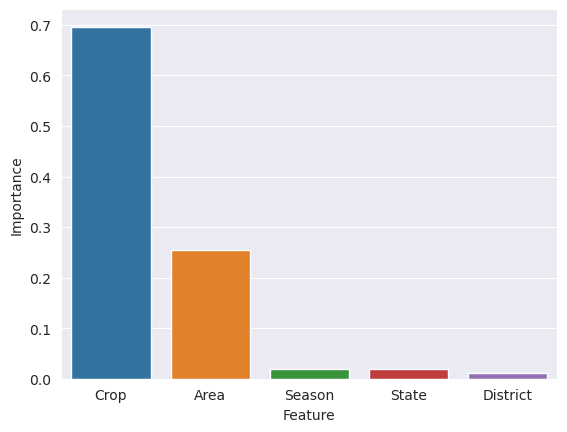

In [25]:
sns.barplot(x='Feature',y='Importance',data=feature_importance_df)

# Save Model and Mapping Dict

In [26]:
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [29]:
pickle_out = open("mapping_dict.pkl",'wb')
pickle.dump(mapping_dict,pickle_out)
pickle_out.close()